# Text Analysis

The third notebook in the Parti Pris repository contains code for exploratory text analysis.

Parti Pris is a unique archive for trancing the evolution of the discourses of blackness in the 1960s in Quebec. One of the important figures in this intersection is [Pierre Vallières](https://en.wikipedia.org/wiki/Pierre_Valli%C3%A8res). His *N_gres blancs d'Amérique* translated as *White N-Words of America* published in 1968, came out of the same circles as Parti Pris. His ideas on race and the struggles of French-Canadians are echoed in the pages of Parti Pris. This led us to investigate how some terms associated with this particular discourse appear in the Parti Pris corpus.

Chloé Brault's typographical approach prioritizes not reproducing the n-word despite it appearing in Vallières' title and in the Parti Pris corpus. In French, she transcribes the n-word as n_gre. We followed the same logic in our keyword search and use regular expressions. We write the n-word in all its inflected forms as `n\w{1}gre`. Here the regular expression searches for a word that starts with n followed by one letter and then gre. It serves the same function as searching for the word itself. Throughout this notebook you will see this notation in our code. We will do our best to ensure that the outputs of our text analysis, which use the actual texts from the Parti Pris, also do not display the n-word. This might not always be possible, so we appreciate your patience. 

1. keyword search and frequencies over time
   1. unigram: n\w{1}gre,  n\w{1}gres
   2. bigram: roi n\w{1}gre, rois n\w{1}gres, n\w{1}gre blanc, n\w{1}gres blancs

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Replace the path below with the actual location of your partipris_v3 dataset
# Example assumes a CSV file; adjust if your data is in a different format

df = pd.read_csv('../data/processed/partipris_v3.csv')

# Display the first few rows to verify
df.head()

,source_file,author,title,page_range,text,volume_number,issue_number,season_or_month,year
0,163122_1-1964-09.json,parti pris,manifeste 64-65,4-17,manifeste 64-65 Toute révolution détruit l'anc...,2,1,septembre,1964
1,163122_1-1964-09.json,la direction.,lettre au lecteur,18-19,lettre au lecteur parti pris se prépare à une ...,2,1,septembre,1964
2,163122_1-1964-09.json,paul chamberland,bilan d'un combat,20-35,bilan d'un combat paul chamberland Nous lutton...,2,1,septembre,1964
3,163122_1-1964-09.json,jean-marc piotte,autocritique de parti pris,36-44,autocritique de parti pris jean-marc piotte Pi...,2,1,septembre,1964
4,163122_1-1964-09.json,pierre maheu,notes pour une politisation,45-56,notes pour une politisation pierre maheu Dans ...,2,1,septembre,1964


In [3]:
# Define keywords and regular expressions
keywords = {
    'n\\w{1}gre': r'n\w{1}gre',
    'n\\w{1}gres': r'n\w{1}gres',
    'roi n\\w{1}gre': r'roi n\w{1}gre',
    'rois n\\w{1}gres': r'rois n\w{1}gres',
    'n\\w{1}gre blanc': r'n\w{1}gre blanc',
    'n\\w{1}gres blancs': r'n\w{1}gres blancs'
}

In [4]:
# Ensure the year column is present and clean
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Initialize a results DataFrame
results = []

for year, group in df.groupby('year'):
    year_data = {'year': year}
    texts = group['text'].dropna().astype(str)
    for key, pattern in keywords.items():
        count = texts.apply(lambda x: len(re.findall(pattern, x, flags=re.IGNORECASE))).sum()
        year_data[key] = count
    results.append(year_data)

freq_df = pd.DataFrame(results).sort_values('year').reset_index(drop=True)
freq_df

,year,n\w{1}gre,n\w{1}gres,roi n\w{1}gre,rois n\w{1}gres,n\w{1}gre blanc,n\w{1}gres blancs
0,1963,4,1,1,0,0,0
1,1964,22,12,1,5,0,0
2,1965,15,7,0,0,0,2
3,1966,15,5,0,0,0,1
4,1967,5,3,1,0,0,0
5,1968,21,19,0,0,0,10


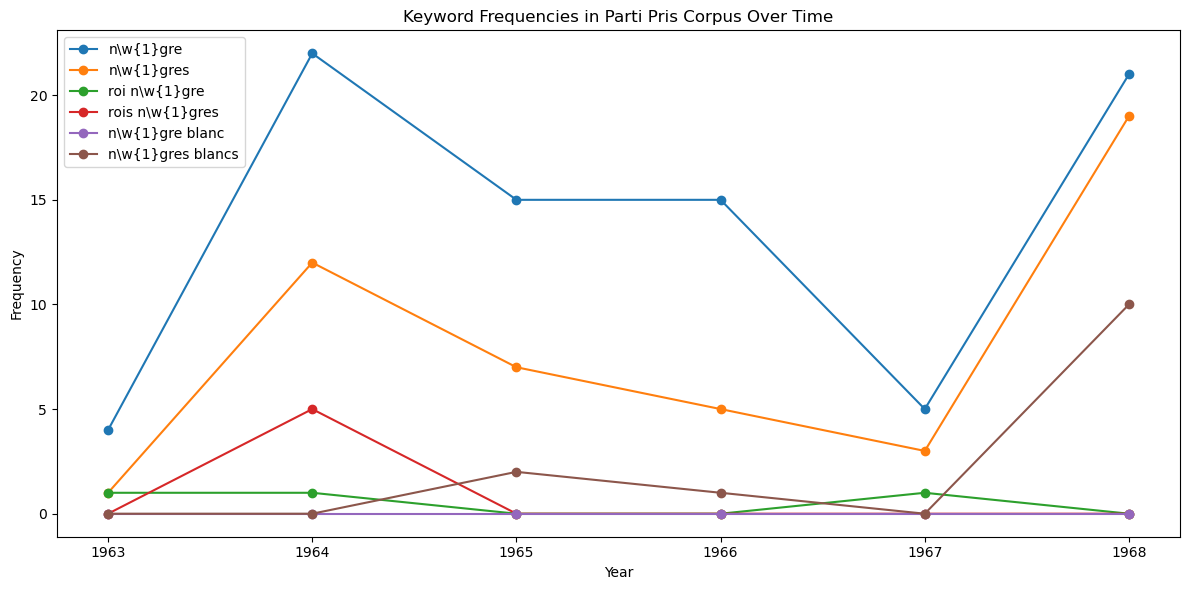

In [5]:
plt.figure(figsize=(12, 6))
for key in keywords.keys():
    plt.plot(freq_df['year'], freq_df[key], marker='o', label=key)

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Keyword Frequencies in Parti Pris Corpus Over Time')
plt.legend()
plt.tight_layout()
plt.show()